**Question 1**

* Provide at least two methods to view the number of of rows and the number of columsn in the `mpg` dataset


In [2]:
# Write your code here
install.packages('tidyverse')
library(ggplot2)

also installing the dependencies ‘knitr’, ‘rmarkdown’, ‘selectr’, ‘stringi’, ‘broom’, ‘modelr’, ‘reprex’, ‘rvest’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘stringi’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘stringr’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘knitr’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘selectr’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘broom’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘rmarkdown’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘modelr’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘rvest’ had non-zero exi

In [10]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


In [12]:
nrow(mpg)
ncol(mpg)

[1] 234

[1] 11

**Question 2**

* Run the following code:
```R
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))
```
* What is wrong with the code. 
* Fix it so that the plot is displayed correctly.

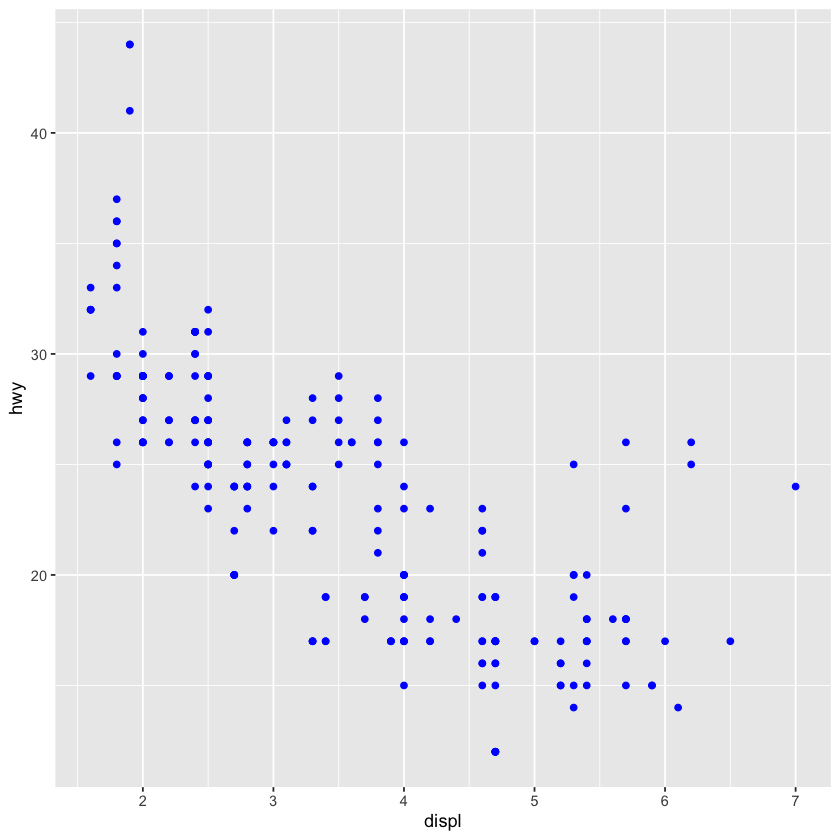

In [4]:
# Write your code here
## the color displayed is not blue, but orange. to fix, remove out of aes function
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

**Question 3**

* Change the code below so that mpg$class_numeric will be of type integer (int) rather than double (dbl)
```R
mpg$class_numeric = sapply(mpg$class, convert_class_int, USE.NAMES = FALSE)
```
* Inspect the result to make sure your solution worked

In [28]:
# Write your code here
mpg$class_integer <- as.integer(factor(mpg$class,levels = c("subcompact", "compact", "suv", "midsize", "2seater", "pickup", "minivan"),ordered = TRUE))

head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,class_integer
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,2


**Question 4** 

* Use a scatter plot to plot the variable `cty` (`x`-axis) and `hwy` (`y`-axis) of the `mpg` dataset
* Add another geom that shows the liner regression between `x` and `y`
  * The method for computing linear regression should be a linear model `lm` instead of the default (`loess`)
  * Set the line color to `red`
  * color the points by `class` 
  * set the points size to 6

`geom_smooth()` using formula 'y ~ x'



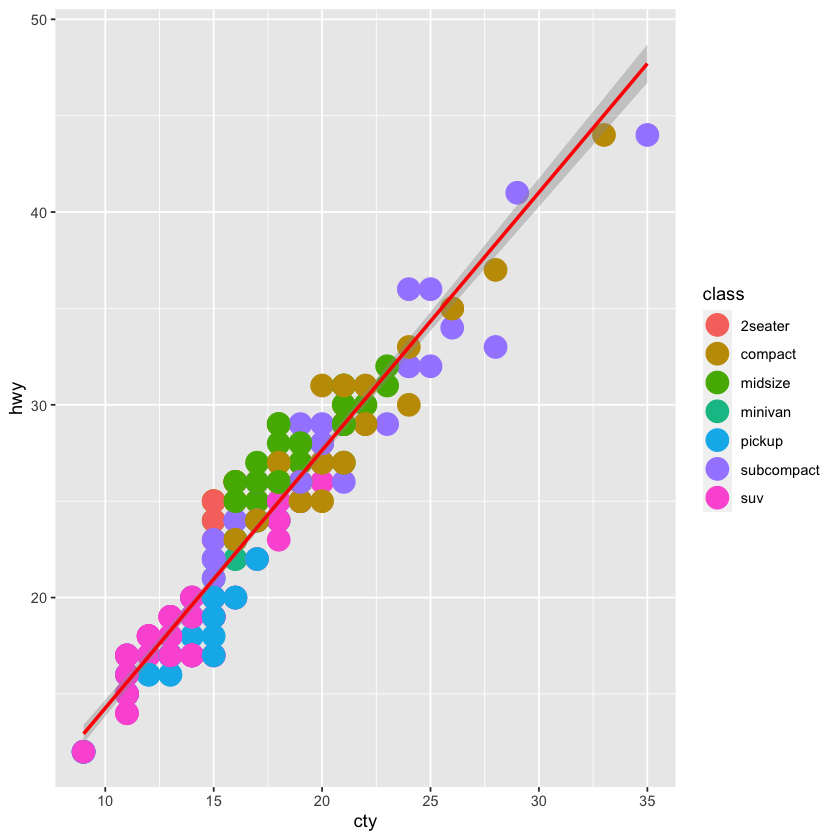

In [29]:
ggplot(mpg) + 
geom_point(mapping = aes (x = cty, y = hwy, color = class), size = 6) + geom_smooth(mapping = aes (x = cty, y = hwy), color = "red", method = 'lm')

**Question 5** 

* You noticed in the previous plot that there exist in the dataset subcompacts that has a city fuel consumption of 15 miles per gallon.
* Extract the manufacturer and model of these subcompacts
  * results should only have these columnsa

In [43]:
# Write your code here
head ( subset(mpg, cty == 15,))

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,class_integer
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact,2
audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact,2
audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,4
chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater,5
chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,5
chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,5


**Question 6**

* The following generates a warning
```R
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))
```

* How can you fix that the code so all classes are displayed
* Hint: you can manually specify your own values for the shapes to use using `scale_shape_manual` geom.  You can select any of the [following shapes](https://ggplot2.tidyverse.org/articles/ggplot2-specs_files/figure-html/unnamed-chunk-7-1.png)

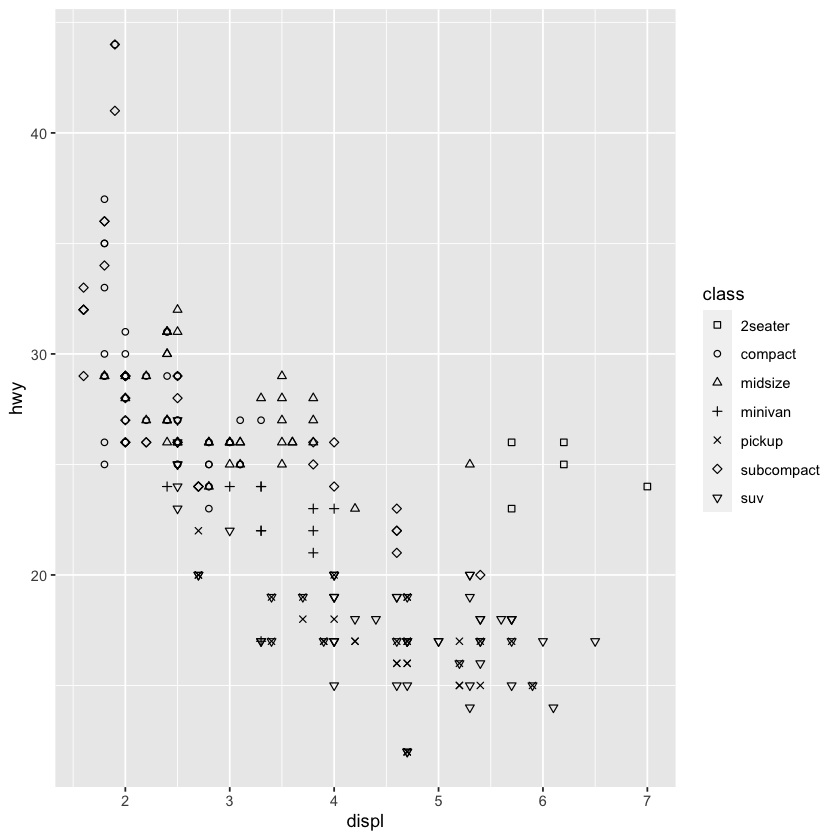

In [6]:
# Write your code here
ggplot(data = mpg) + 
geom_point(mapping = aes(x = displ, y = hwy, shape = class)) +
scale_shape_manual(values = c(0,1,2,3,4,5,6,7))

**Question 7**

* Given the following two vectors

```R
x <- c(3.385,0.48,1.35,465,36.33,27.66,14.83,1.04,4.19,0.425,0.101,0.92,1,0.005,0.06,3.5,2,1.7,2547,0.023,187.1,521,0.785,10,3.3,0.2,1.41,529,207,85,0.75,62,6654,3.5,6.8,35,4.05,0.12,0.023,0.01,1.4,250,2.5,55.5,100,52.16,10.55,0.55,60,3.6,4.288,0.28,0.075,0.122,0.048,192,3,160,0.9,1.62,0.104,4.235)
y <- c(44.5,15.5,8.1,423,119.5,115,98.2,5.5,58,6.4,4,5.7,6.6,0.14,1,10.8,12.3,6.3,4603,0.3,419,655,3.5,115,25.6,5,17.5,680,406,325,12.3,1320,5712,3.9,179,56,17,1,0.4,0.25,12.5,490,12.1,175,157,440,179.5,2.4,81,21,39.2,1.9,1.2,3,0.33,180,25,169,2.6,11.4,2.5,50.4)
```
* Combine the two vectors into a data frame called `sizeMass`
  * Name the columns containing the vectors `x` and `y` as `size` and `mass` respectively 

* Use the code below to plot the data
  * If you followed the above instructions the code should work without modification

```R
ggplot(sizeMass, aes(size, mass)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", se = FALSE)

```  


`geom_smooth()` using formula 'y ~ x'



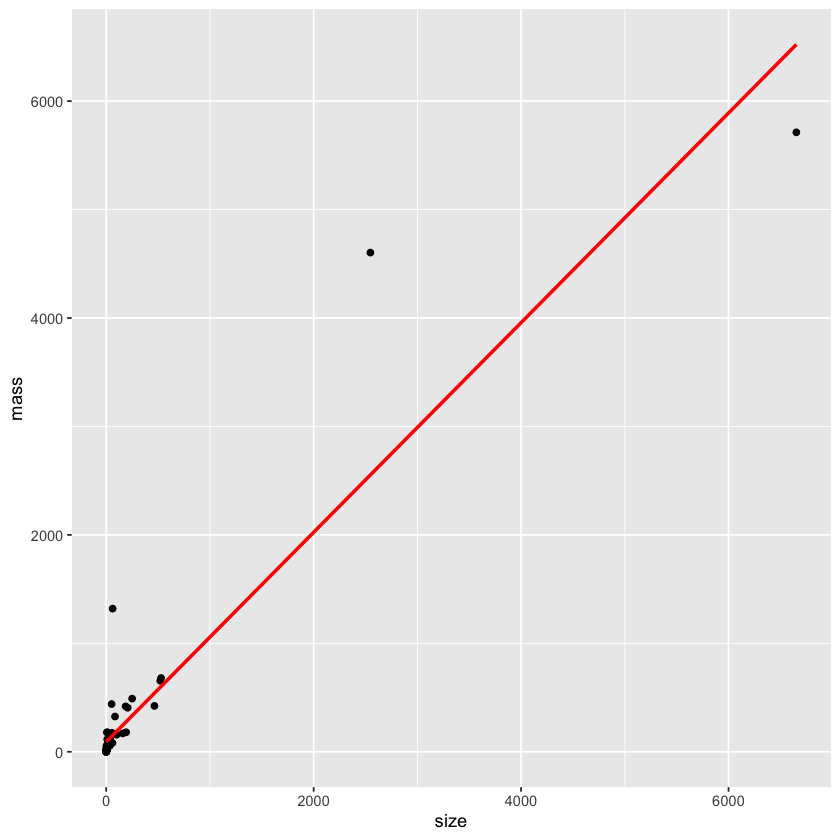

In [7]:
# Write your code here

size <- c(3.385,0.48,1.35,465,36.33,27.66,14.83,1.04,4.19,0.425,0.101,0.92,1,0.005,0.06,3.5,2,1.7,2547,0.023,187.1,521,0.785,10,3.3,0.2,1.41,529,207,85,0.75,62,6654,3.5,6.8,35,4.05,0.12,0.023,0.01,1.4,250,2.5,55.5,100,52.16,10.55,0.55,60,3.6,4.288,0.28,0.075,0.122,0.048,192,3,160,0.9,1.62,0.104,4.235)
mass <- c(44.5,15.5,8.1,423,119.5,115,98.2,5.5,58,6.4,4,5.7,6.6,0.14,1,10.8,12.3,6.3,4603,0.3,419,655,3.5,115,25.6,5,17.5,680,406,325,12.3,1320,5712,3.9,179,56,17,1,0.4,0.25,12.5,490,12.1,175,157,440,179.5,2.4,81,21,39.2,1.9,1.2,3,0.33,180,25,169,2.6,11.4,2.5,50.4)

sizeMass <- data.frame(size, mass)

ggplot(sizeMass, aes(size, mass)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", se = FALSE)

**Question 8** 

* In the above, the data is "squashed" because the data range varies substantially across observations. One way to fix this is by computing the log of the data. We will do that using two different approaches

1. add two new columns called them `size_log10` and `mass_log` that represent the log 10 values of the `size` and `mass` columns. Then, reuse the plotting code above by replacing `size` and `mass` with `size_log10` and `mass_log10` respectively
  * Hint `log10()` can take as input a single value or a vector

2. Use the `scale_x_log10()` and `scale_y_log10()` to set different scales for the `x` and `y` aesthetics
  * Simply add these transforms to the initial snippet of code prior to plotting `geom_point` or `geom_smooth`

`geom_smooth()` using formula 'y ~ x'



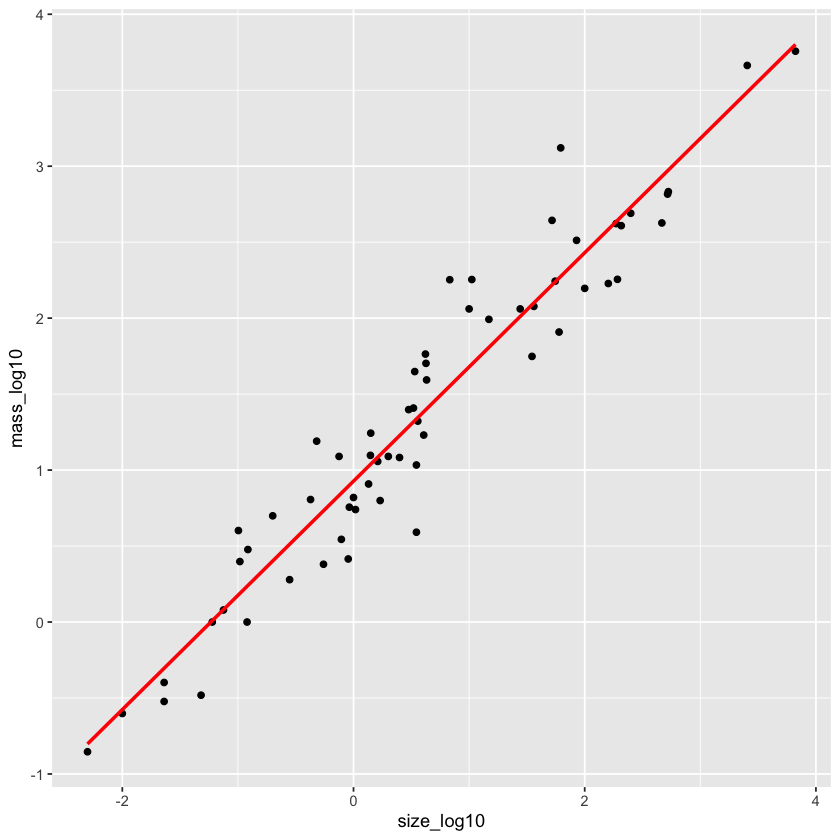

In [46]:
# Write your code here (method 1 )

size <- c(3.385,0.48,1.35,465,36.33,27.66,14.83,1.04,4.19,0.425,0.101,0.92,1,0.005,0.06,3.5,2,1.7,2547,0.023,187.1,521,0.785,10,3.3,0.2,1.41,529,207,85,0.75,62,6654,3.5,6.8,35,4.05,0.12,0.023,0.01,1.4,250,2.5,55.5,100,52.16,10.55,0.55,60,3.6,4.288,0.28,0.075,0.122,0.048,192,3,160,0.9,1.62,0.104,4.235)
mass <- c(44.5,15.5,8.1,423,119.5,115,98.2,5.5,58,6.4,4,5.7,6.6,0.14,1,10.8,12.3,6.3,4603,0.3,419,655,3.5,115,25.6,5,17.5,680,406,325,12.3,1320,5712,3.9,179,56,17,1,0.4,0.25,12.5,490,12.1,175,157,440,179.5,2.4,81,21,39.2,1.9,1.2,3,0.33,180,25,169,2.6,11.4,2.5,50.4)

size_log10 <- log10(size)

mass_log10 <- log10(mass)

sizeMass <- data.frame(size_log10, mass_log10)

ggplot(sizeMass, aes(size_log10,mass_log10)) + geom_point() + geom_smooth(method = "lm", color = "red", se = FALSE)
